# Prática 2
## Passos 1 e 2

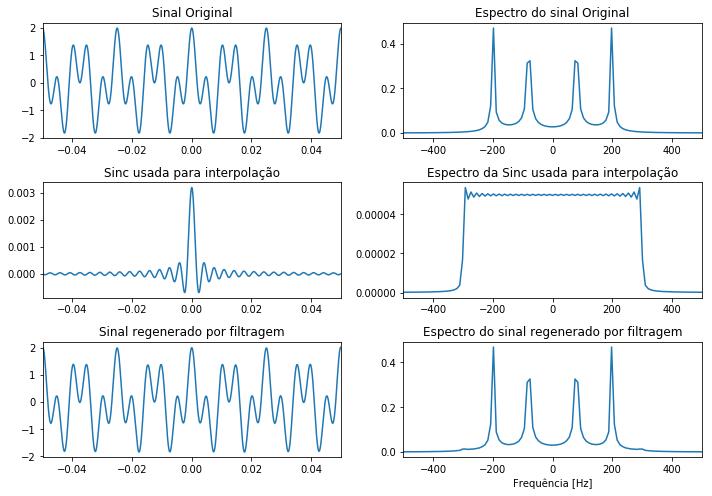

In [2]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=300                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,1+Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

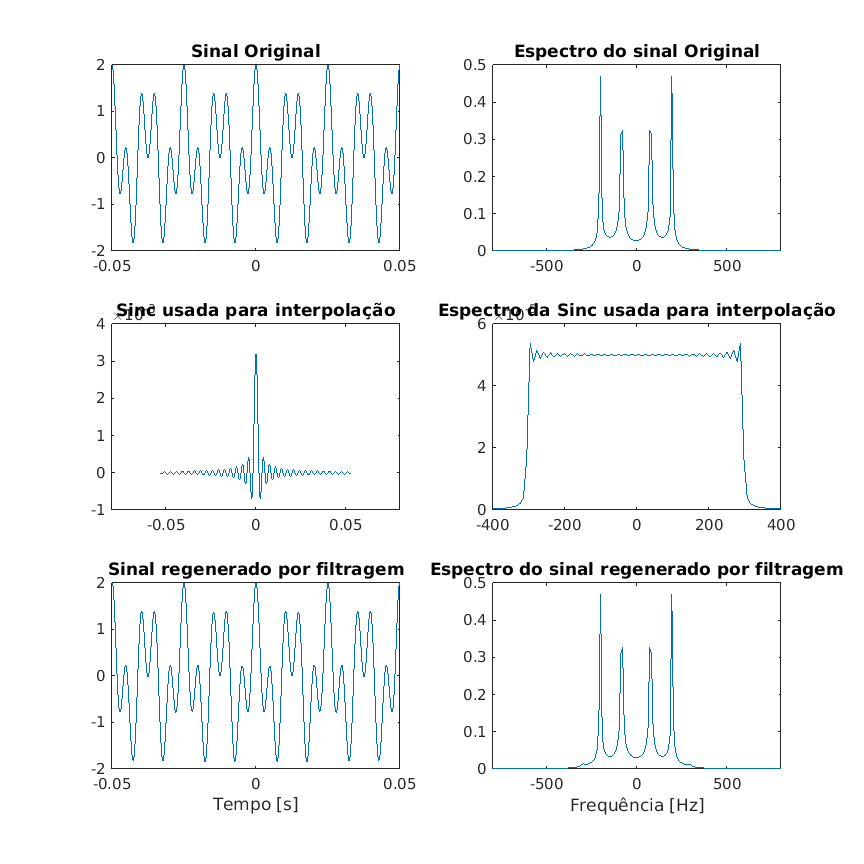

In [2]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=300;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

O sinal não tinha sido regenerado de forma equivalente ao original devido a banda do filtro, ao aumentar a banda para 300Hz, podemos recuperar o sinal. 

# Prática 3
## Passos 1 e 2

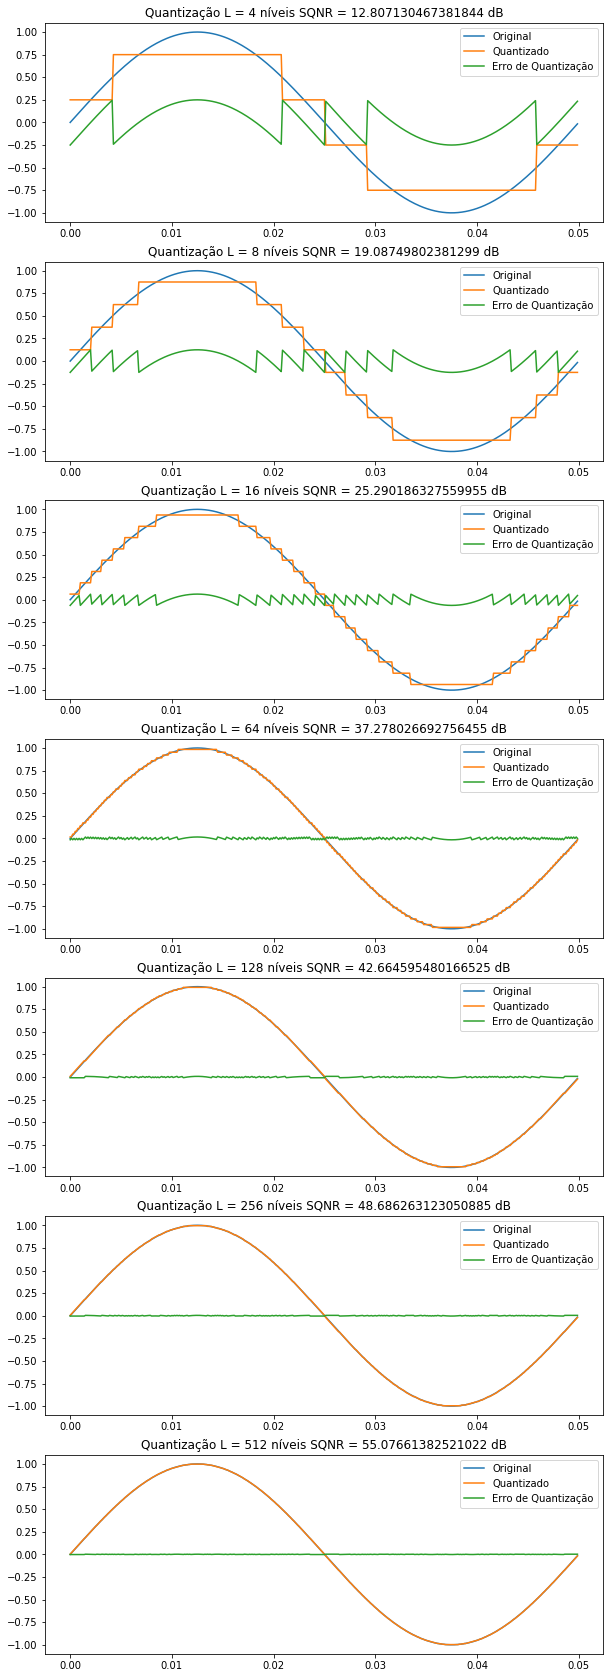

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64, 128, 256, 512 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,30])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    
    sqnrdb=20*np.log10(np.linalg.norm(m_t)/np.linalg.norm(m_t-q_out)) #SQNR em dB
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis'.format(Li)+' SQNR = {} dB'.format(sqnrdb))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()

Primeiro, notamos que ao aumentar o número de níveis, temos um erro de quantização praticamente zero. Já para conseguimos um SQRN de aproximadamente 48.5dB, foram necessarios uma quantização de 256 níveis. 

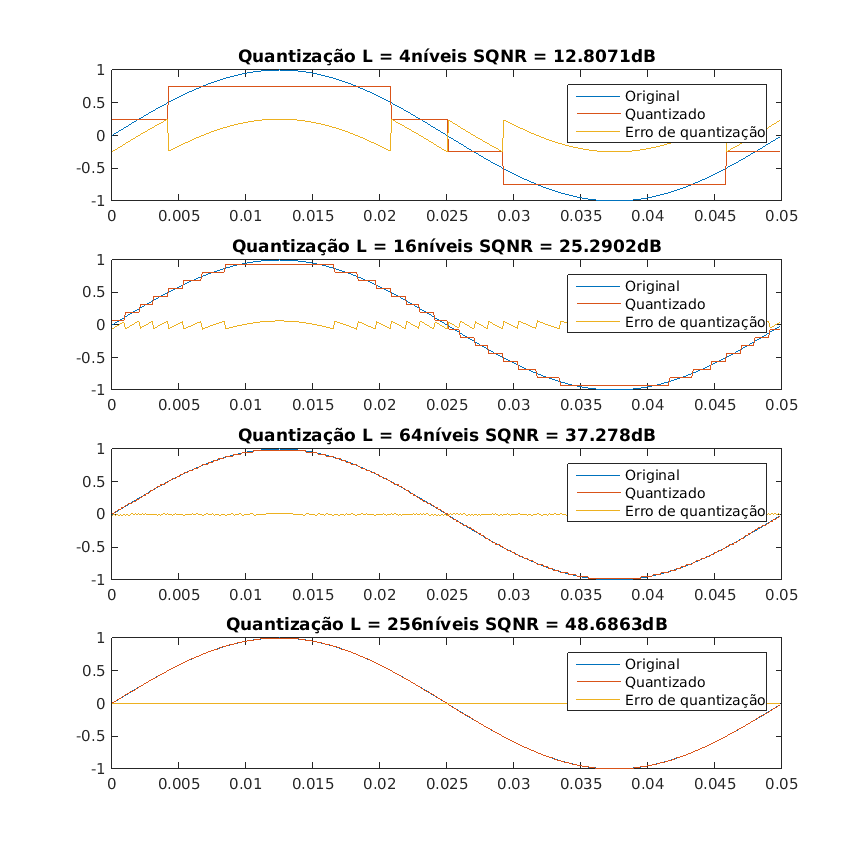

In [1]:
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [ 4 16 64 256];                                   % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo
%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    %
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    % Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta);                            
    sigp=sigp+1/2;                                  % Tira elementos do zero
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp);                             % Encontra inteiro mais proximo para cada elemento
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    sqnrdb=20*log10(norm(m_t)/norm(m_t-q_out));
    % Gráficos
    subplot(length(L),1,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['Quantização L = ' num2str(Li) 'níveis SQNR = ' num2str(sqnrdb) 'dB' ]);
end

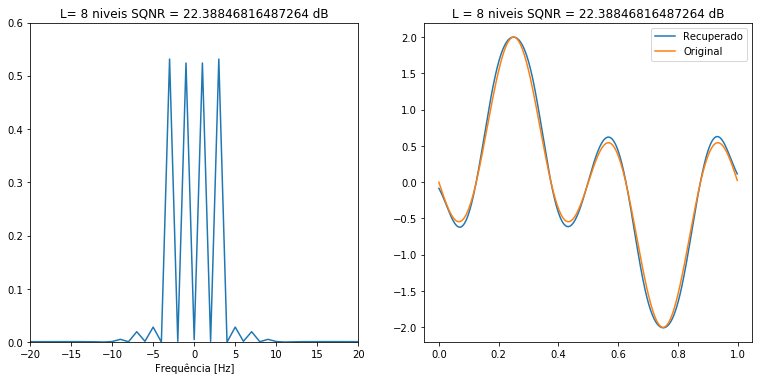

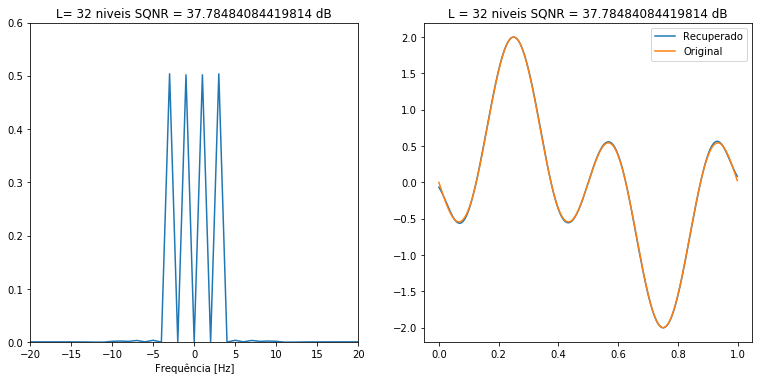

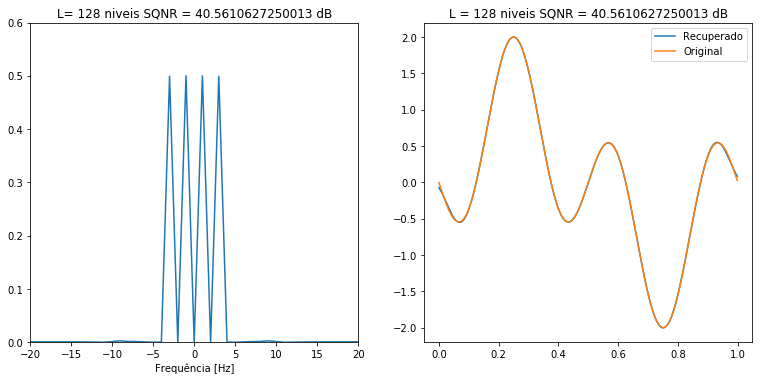

In [13]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft

variaveis = loadmat('/home/victor/Amostragem.mat')    
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])                
L = [8, 32, 128]                                    
sig_max=max(m_t)    
sig_min=min(m_t)    


for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) 
    sigp=m_t-sig_min                                 
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          
    qindex=np.round(sigp)                            
    qindex[qindex>Li] = Li                            
    qindex = qindex.astype(int)                      
    q_out=q_level[abs(qindex-1)]                            
    Tsinc = 0.002                                                
    Tfsinc = 50                                                  
    tsinc = np.arange(0,Tfsinc,Tsinc)                            
    nSamples = len(q_out)                                        
    xSamples = np.arange(0,nSamples)                             
    s_recvSinc=0
    
    for ik in xSamples:      
      Sinc = q_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))       
      s_recvSinc = s_recvSinc+Sinc                                
    s_recvSinc=s_recvSinc[0:lfft]                                
    s_recvSinc=s_recvSinc*(np.max(m_t)/np.max(s_recvSinc))       
    S_recvSinc = fftshift(fft(s_recvSinc,lfft)/lfft)

    sqnrdb=20*np.log10(np.linalg.norm(m_t)/np.linalg.norm(m_t-s_recvSinc)) 
    
    plt.figure(1,[20,20])
    plt.subplot(331)
    plt.plot(freq,np.abs(S_recvSinc))
    plt.title("L= {} niveis".format(Li)+' SQNR = {} dB'.format(sqnrdb))
    plt.xlabel("Frequência [Hz]")
    plt.xlim([-20,20])
    plt.ylim([0,0.6])
   
    plt.subplot(332)
    plt.plot(t,s_recvSinc[:lfft],t,m_t)
    plt.title("L = {} niveis".format(Li)+' SQNR = {} dB'.format(sqnrdb))
    plt.legend(["Recuperado", "Original"])
    plt.show()

Podemos notar pelo sinal recuperado no tempo, que ao aumentar os niveis de quantização, ele vai se assemelhar muito com o sinal original, já na frequência podemos ver que o aumento dos niveis, funciona como um filtro, removendo picos de frequências que não tem no sinal original e aparecem no sinal recuperado quando este foi quantizado com baixo numero de niveis. 